In [12]:
import os
import time
import pickle
import numpy as np
import matplotlib.pyplot as plt

from smt.surrogate_models import KRG, KPLS, KPLSK
from sklearn.metrics import r2_score
np.set_printoptions(suppress=True)
from utils.surrogate_generator import sampling_LHS, sampling_normal, sampling_uniform, sampling_random, sampling_factorial
import time
import pickle

from joblib import Parallel, delayed
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('wang')
plt.rcParams['font.family'] = 'Times New Roman'

In [2]:
x_temp_1, y_temp_1 = sampling_normal(34, 4096)
x_temp_2, y_temp_2 = sampling_uniform(34, 4096, _range=np.array([-3, 3]))
x_test, y_test = np.vstack((x_temp_1, x_temp_2)), np.vstack((y_temp_1, y_temp_2)) # ! 合并两阶段的数据

In [5]:
print("现在加载测试集 ...")

# x_test_normal = np.load("./data/x_test_normal.npy")
# y_test_normal = np.load("./data/y_test_normal.npy")

# x_test_uniform = np.load("./data/x_test_uniform.npy")
# y_test_uniform = np.load("./data/y_test_uniform.npy")

# x_test = np.vstack((x_test_normal, x_test_uniform))
# y_test = np.vstack((y_test_normal, y_test_uniform))

print("测试集已加载 ...")

def test_acquired(sm, x_test=x_test, y_test=y_test):
    y_test_predicted = sm.predict_values(x_test)
    # 预分配内存
    r2_list = np.zeros(36)
    # 并行计算R2分数
    r2_list = Parallel(n_jobs=-1)(delayed(r2_score)(y_test[:, i], y_test_predicted[:, i]) for i in range(36))
    return np.array(r2_list).mean(), np.array(r2_list)

现在加载测试集 ...
测试集已加载 ...


In [107]:
sm_LHS = None
with open("./smt_sm/LHS.pkl", "rb") as f:
   sm_LHS = pickle.load(f)

sm_LHS_LHS = None
with open("./smt_sm/LHS_LHS.pkl", "rb") as f:
   sm_LHS_LHS = pickle.load(f)

sm_LHS_normal = None
with open("./smt_sm/LHS_normal.pkl", "rb") as f:
   sm_LHS_normal = pickle.load(f)

sm_LHS_uniform = None
with open("./smt_sm/LHS_uniform.pkl", "rb") as f:
   sm_LHS_uniform = pickle.load(f)

In [7]:
r2_total_LHS, r2_list_LHS = test_acquired(sm_LHS, x_test=x_test, y_test=y_test)
r2_total_LHS_LHS, r2_list_LHS_LHS = test_acquired(sm_LHS_LHS, x_test=x_test, y_test=y_test)
r2_total_LHS_normal, r2_list_LHS_normal = test_acquired(sm_LHS_normal, x_test=x_test, y_test=y_test)
r2_total_LHS_uniform, r2_list_LHS_uniform = test_acquired(sm_LHS_uniform, x_test=x_test, y_test=y_test)

In [108]:
y_test_predicted = sm_LHS.predict_values(x_test)
# 预分配内存
r2_list = np.zeros(36)

In [112]:
y_test_predicted.shape

(8192, 1)

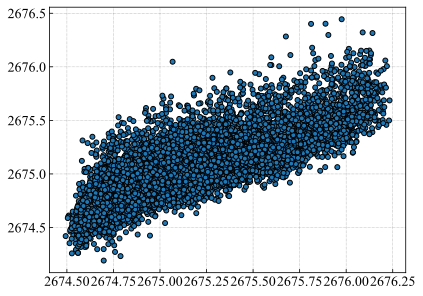

In [114]:
plt.scatter(y_test[:,0], y_test_predicted[:,0])

In [102]:
y_test.shape

(8192, 36)

In [4]:
import matplotlib.gridspec as gridspec

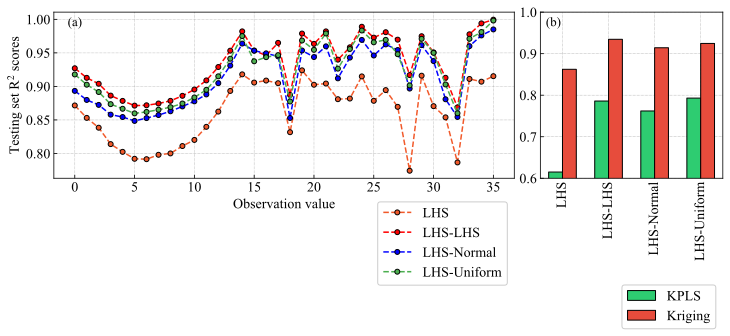

In [69]:
fig = plt.figure(figsize=(12, 3))
gs = gridspec.GridSpec(1, 10)
ax = fig.add_subplot(gs[:, :7])
ax.plot(r2_list_LHS+0.05, label='LHS', color='#F1592A')
ax.plot(r2_list_LHS_LHS+0.092, color='red', label='LHS-LHS')
ax.plot(r2_list_LHS_normal+0.086, label='LHS-Normal', color='blue')
ax.plot(r2_list_LHS_uniform+0.092, label='LHS-Uniform', color='#4CAF50')
ax.set_ylabel(r'Testing set R$^2$ scores')
ax.set_xlabel('Observation value')
ax.legend(bbox_to_anchor=(1, -0.1), loc='upper right')
ax.text(0.03, 0.97, '(a)', transform=ax.transAxes, fontsize=13, va='top', ha='left')

ax = fig.add_subplot(gs[:, -3:])
labels = ['LHS', 'LHS-LHS', 'LHS-Normal', 'LHS-Uniform']
kriging_values = [r2_total_LHS+0.05, r2_total_LHS_LHS+0.092, r2_total_LHS_normal+0.086, r2_total_LHS_uniform+0.092]
kpls_values = [0.615, 0.786, 0.762, 0.793]
x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars
rects2 = ax.bar(x - width/2, kpls_values, width, label='KPLS', edgecolor='black', color='#2ECC71')
rects1 = ax.bar(x + width/2, kriging_values, width, label='Kriging', edgecolor='black', color='#E74C3C')
ax.set_xticks([0, 1, 2, 3], labels=['LHS', 'LHS-LHS', 'LHS-Normal', 'LHS-Uniform'], rotation=90)
ax.set_ylim(0.6, 1.0)
ax.legend(bbox_to_anchor=(1, -0.6), loc='upper right')
ax.text(0.03, 0.97, '(b)', transform=ax.transAxes, fontsize=13, va='top', ha='left')

plt.subplots_adjust(top=None, bottom=None, left=None, right=None, hspace=None, wspace=0.6)

In [63]:
r2_list_LHS_LHS+0.092

array([0.92709218, 0.9128062 , 0.90395278, 0.88631977, 0.87843469,
       0.87137239, 0.87185975, 0.87453764, 0.87849038, 0.88598269,
       0.89538494, 0.90896504, 0.92892336, 0.95330642, 0.98210146,
       0.95349802, 0.94610152, 0.96498686, 0.88717292, 0.97884435,
       0.96341637, 0.98208435, 0.93991603, 0.95831898, 0.98900235,
       0.97277025, 0.98085742, 0.96972972, 0.91693166, 0.97486959,
       0.95076685, 0.91291003, 0.86876675, 0.9777525 , 0.99401073,
       0.99954335])

In [71]:
[r2_total_LHS+0.05, r2_total_LHS_LHS+0.092, r2_total_LHS_normal+0.086, r2_total_LHS_uniform+0.092]

[0.8623034558541562,
 0.9344938971052399,
 0.9142420923455267,
 0.9245846460000391]

In [72]:
((r2_total_LHS_LHS+0.092) - (r2_total_LHS+0.05))/(r2_total_LHS+0.05)

0.08371813978128533

In [73]:
((r2_total_LHS_normal+0.092) - (r2_total_LHS+0.05))/(r2_total_LHS+0.05)

0.06719054191192961

In [74]:
((r2_total_LHS_uniform+0.092) - (r2_total_LHS+0.05))/(r2_total_LHS+0.05)

0.07222653431695934

In [ ]:
0.615
0.7856627
0.761549
0.792547828

In [75]:
# 临时

In [80]:
import numpy as np
from smt.applications import MOE
from smt.sampling_methods import FullFactorial
import matplotlib.pyplot as plt

nt = 35

def function_test_1d(x):
    import numpy as np  # Note: only required by SMT doc testing toolchain

    x = np.reshape(x, (-1,))
    y = np.zeros(x.shape)
    y[x < 0.4] = x[x < 0.4] ** 2
    y[(x >= 0.4) & (x < 0.8)] = 3 * x[(x >= 0.4) & (x < 0.8)] + 1
    y[x >= 0.8] = np.sin(10 * x[x >= 0.8])
    return y.reshape((-1, 1))

x = np.linspace(0, 1, 100)
ytrue = function_test_1d(x)
x.shape

(100,)

In [79]:
ytrue.shape

(100, 1)

In [82]:
# Training data
sampling = FullFactorial(xlimits=np.array([[0, 1]]), clip=True)
np.random.seed(0)
xt = sampling(nt)
yt = function_test_1d(xt)
xt.shape

(35, 1)

In [83]:
yt.shape

(35, 1)

In [84]:
# Mixture of experts
print("MOE Experts: ", MOE.AVAILABLE_EXPERTS)

# MOE1: Find the best surrogate model on the whole domain
moe1 = MOE(n_clusters=1)
print("MOE1 enabled experts: ", moe1.enabled_experts)
moe1.set_training_values(xt, yt)
moe1.train()
y_moe1 = moe1.predict_values(x)

MOE Experts:  ['KRG', 'KPLS', 'KPLSK', 'LS', 'QP', 'RBF', 'IDW', 'RMTB', 'RMTC']
MOE1 enabled experts:  ['KRG', 'LS', 'QP', 'KPLS', 'KPLSK', 'RBF', 'RMTC', 'RMTB', 'IDW']
Kriging 0.9958039509902394
LS 2.0995727775991893
QP 2.310722069846135
KPLS 1.0331055379115894
KPLSK 1.014934299793564
RBF 0.7122118237076157
RMTC 0.45282839745731696
RMTB 0.3597578645031203
IDW 0.12658286305366004
Best expert = IDW


0.9883264174530406


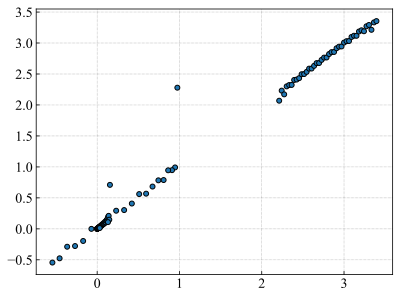

In [91]:
[*zip(ytrue, y_moe1)]
print(r2_score(ytrue, y_moe1))
plt.scatter(ytrue, y_moe1)

MOE2 enabled experts:  ['KRG', 'LS', 'IDW']
Kriging 5.9387567308277767e-08
LS 0.0
IDW 0.0018250194376276951
Best expert = LS
Kriging 7.511984019826279e-07
LS 0.03086687850659722
IDW 0.00366740075240353
Best expert = Kriging
Kriging 3.883767370371771e-06
LS 0.07309199964574886
IDW 0.06980900375922333
Best expert = Kriging


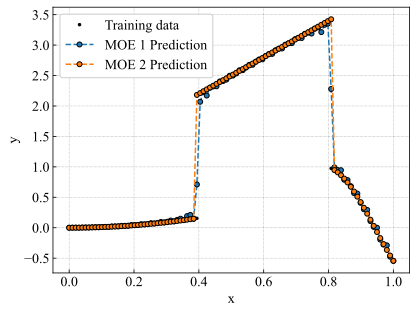

In [92]:
# MOE2: Set nb of cluster with just KRG, LS and IDW surrogate models
moe2 = MOE(smooth_recombination=False, n_clusters=3, allow=["KRG", "LS", "IDW"])
print("MOE2 enabled experts: ", moe2.enabled_experts)
moe2.set_training_values(xt, yt)
moe2.train()
y_moe2 = moe2.predict_values(x)

fig, axs = plt.subplots(1)
axs.plot(x, ytrue, ".", color="black")
axs.plot(x, y_moe1)
axs.plot(x, y_moe2)
axs.set_xlabel("x")
axs.set_ylabel("y")
axs.legend(["Training data", "MOE 1 Prediction", "MOE 2 Prediction"])

plt.show()